In [1]:
from dna_features_viewer import GraphicFeature, GraphicRecord, BiopythonTranslator
import numpy as np
import pandas as pd

# Get sites under selection and make a protein domain map

In [2]:
gff_file = pd.read_csv("seq_for_analysis/Q9IK91_phosphoprotein.gff", sep="\t", header=None, skiprows=2, usecols=[2, 3, 4, 8])
gff_file.columns = ["Type", "Start", "End", "Description"]

color_dict = {
            "Chain": "lightcyan", # full length protein
            "Disorder": "firebrick",
            "Compositional bias": "lightyellow",
            "Structure": "yellow",
            "Protein Binding": "black",
            "Tetramerization Domain": "yellow",
            #"Natural variant": "lightyellow"
}

# honeydew, moccasin

In [7]:
features = []
box_height = 22

for i, row in gff_file.iterrows():
    
    if row["Type"] in ["Coiled coil", "Helix", "Turn"]:
        ann = "Structure"
    elif row["Type"] in ["Disordered Region"]:
        ann = "Disorder"
    elif row["Type"] == "Natural variant":
        ann = "SNP"
    elif row["Type"] in ["Protein Binding", "Compositional bias"]:
        ann = row["Description"].split("=")[1].split(";")[0].strip("residues").strip(" ")
    else:
        ann = row["Type"]
    
    # don't plot the structure ones because they all lie within the tetramerization domain, except for the one small section at the N terminus
    if row["Type"] not in ["Natural variant", "Phosphorylation", "Compositional bias", "Coiled coil", "Helix", "Turn"]:
        
        if row["Type"] in ["Protein Binding"]:
            color = color_dict[row["Type"]]
        else:
            color = color_dict[ann]
            
        if ann == "L protein binding":
            ann = "Polymerase"
            
        if ann == "Chain":
            ann = ""
                    
        features.append(GraphicFeature(start=row["Start"],
                                       end=row["End"],
                                       strand=+1,
                                       color=color,
                                       label=ann,
                                       thickness=box_height,
                                       fontdict={'fontsize': 18}

                                        )
                       )
        
# manually add STAT1 and N protein binding sites
# https://www.nature.com/articles/s41598-019-53037-0
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7231922/
features.append(GraphicFeature(start=114,
                               end=140,
                               strand=+1,
                               color=color_dict["Protein Binding"],
                               label='STAT1',
                               thickness=box_height,
                               fontdict={'fontsize': 18}
                              )
               )

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7231922/
features.append(GraphicFeature(start=100,
                               end=300,
                               strand=+1,
                               color=color_dict["Protein Binding"],
                               label='STAT2',
                               thickness=box_height,
                               fontdict={'fontsize': 18}
                              )
               )

features.append(GraphicFeature(start=330,
                               end=350,
                               strand=+1,
                               color=color_dict["Protein Binding"],
                               label='Nucleoprotein',
                               thickness=box_height,
                               fontdict={'fontsize': 18}
                              )
               )
features.append(GraphicFeature(start=655,
                               end=709,
                               strand=+1,
                               color=color_dict["Protein Binding"],
                               label='Nucleoprotein',
                               thickness=box_height,
                               fontdict={'fontsize': 18}
                              )
               )
# features.append(GraphicFeature(start=330,
#                                end=350,
#                                strand=+1,
#                                color=color_dict["Protein Binding"],
#                                label='N Protein binding',
#                                thickness=box_height,
#                                fontdict={'fontsize': 18}
#                               )
#                )

features.append(GraphicFeature(start=475,
                               end=578,
                               strand=+1,
                               color=color_dict["Tetramerization Domain"],
                               label='Tetramerization Domain',
                               thickness=box_height,
                               fontdict={'fontsize': 18}
                              )
               )

In [17]:
def plot_protein_with_selected_sites(pos_sites, neg_sites, features, fig_title):
    
    features_updated = features.copy()
    
    if pos_sites is not None:
        for site in pos_sites:
            features_updated.append(GraphicFeature(start=site, end=site, strand=+1, color="green", label="O", fontdict={'fontsize': 18}, thickness=box_height))
    
    if neg_sites is not None:
        for site in neg_sites:
            features_updated.append(GraphicFeature(start=site, end=site, strand=+1, color="red", label="X", fontdict={'fontsize': 18}, thickness=box_height))
        
    record = GraphicRecord(sequence_length=709, features=features_updated)
    ax, _ = record.plot(figure_width=30)
    ax.figure.tight_layout()
    ax.figure.savefig("figures/" + fig_title + ".png", dpi=300)

## Positive Selection

In [29]:
meme_sig = pd.read_csv("hyphy/MEME/significance_P.csv")
sig_sites = meme_sig.loc[meme_sig["p-value"] <= 0.1].Site.values

meme_sites = meme_sig.loc[meme_sig["p-value"] <= 0.1].Site.values

# 380 was the only site with diversifying selection in FEL
meme_sites

array([ 58,  64, 228, 377, 380, 408, 421, 437, 438])

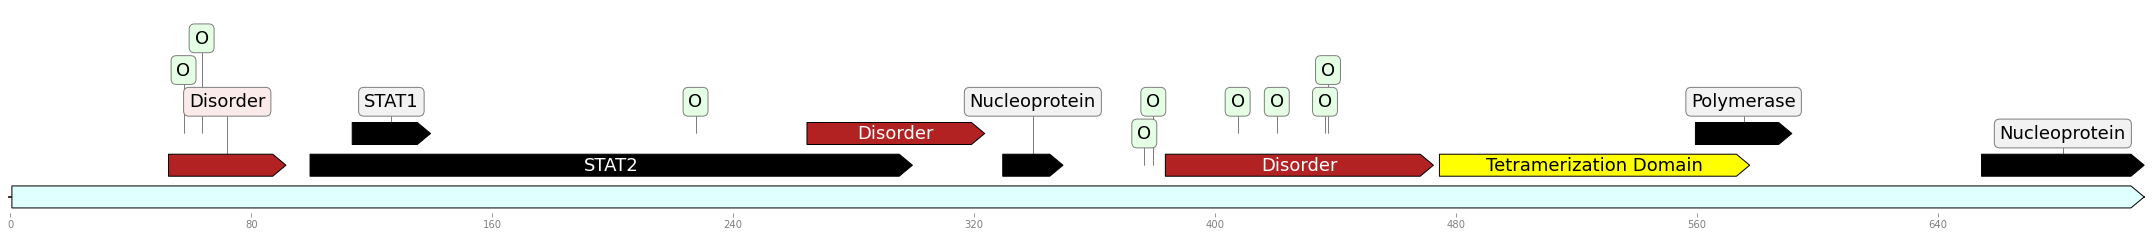

In [19]:
plot_protein_with_selected_sites(meme_sites, None, features, "P_positive_selection")

## Negative Selection

In [21]:
neg_sites_0_05 = [192, 244, 246, 251, 261, 271, 302, 336, 347, 375, 390, 391, 403, 551, 555, 561, 586, 608, 611, 642, 643, 698, 699]
#neg_sites_0_1 = [32, 33, 47, 192, 214, 215, 243, 246, 251, 256, 257, 261, 271, 302, 314, 329, 336, 347, 349, 353, 360, 368, 375, 390, 391, 401, 403, 451, 502, 506, 514, 515, 520, 524, 530, 549, 551, 555, 561, 563, 586, 599, 608, 610, 611, 619, 637, 642, 643, 644, 661, 686, 690, 698, 699, 707]

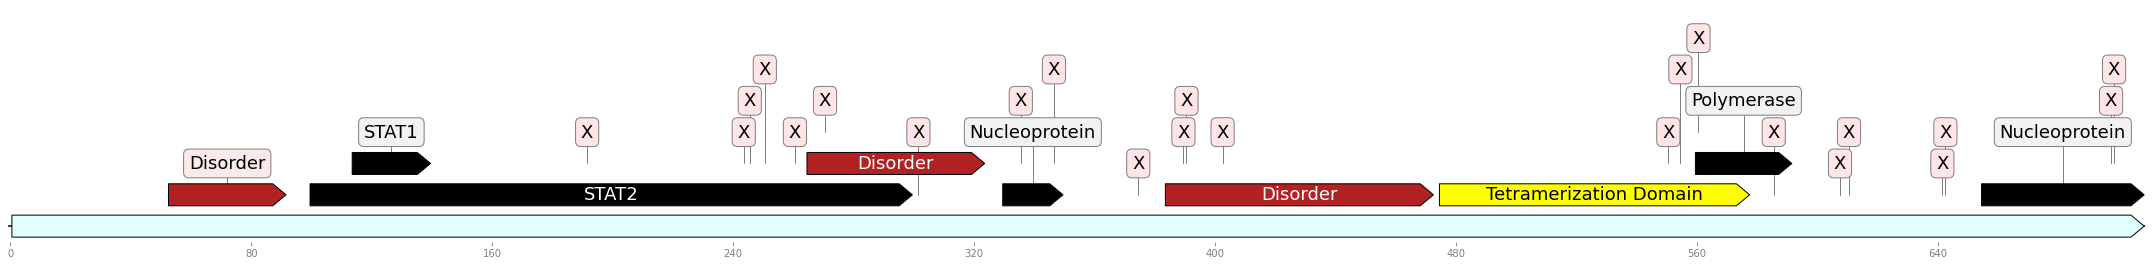

In [25]:
plot_protein_with_selected_sites(None, neg_sites_0_05, features, "P_negative_selection")

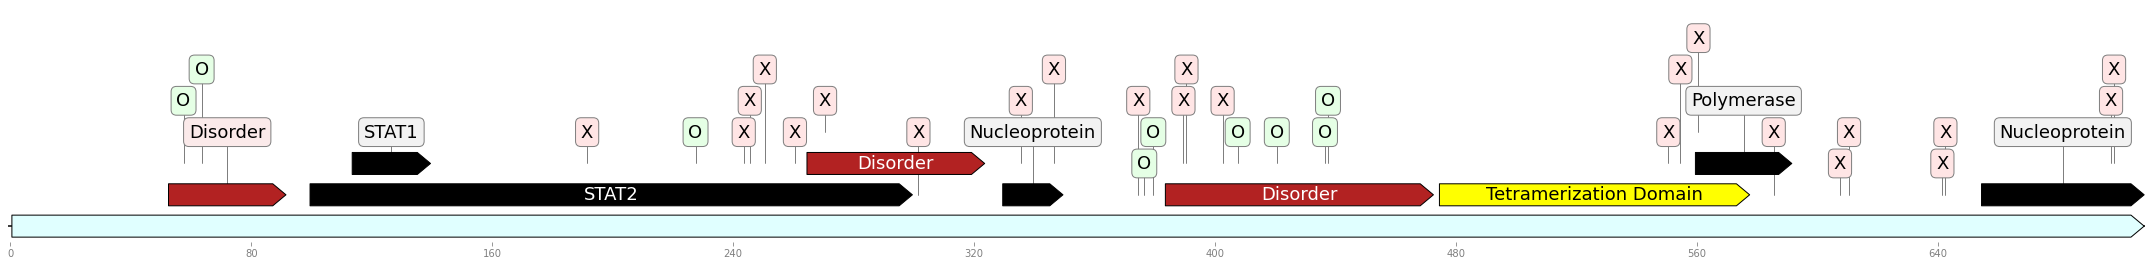

In [23]:
plot_protein_with_selected_sites(meme_sites, neg_sites_0_05, features, "P_selection")

## Contrast FEL

In [27]:
contrast_fel_BGD_MYS = pd.read_csv("hyphy/ContrastFEL/20220807_P_BGD_MYS_table.csv")
contrastFel_BGD_MYS_sites = contrast_fel_BGD_MYS.loc[contrast_fel_BGD_MYS['P-value (overall)'] < 0.05].Site.values
contrastFel_BGD_MYS_sites

array([ 41, 195, 303, 304, 408, 412, 427, 437, 438, 439, 467, 590, 664])

/Users/skulkarni/opt/anaconda3/lib/python3.8/site-packages/dna_features_viewer/GraphicRecord/MatplotlibPlottableMixin.py:477: RuntimeWarning: divide by zero encountered in double_scalars
  n_text_lines_in_axis = ax_height / line_height


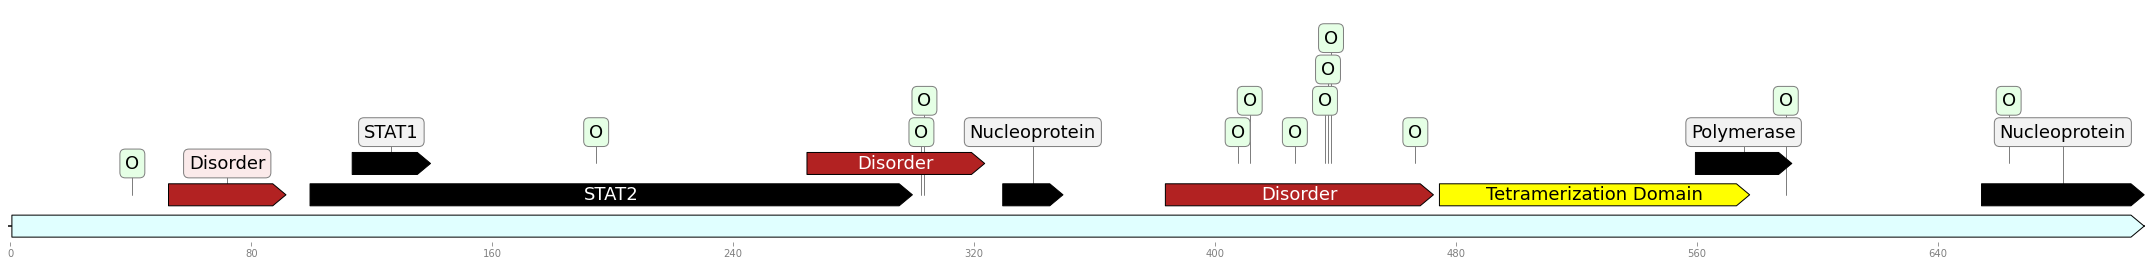

In [28]:
plot_protein_with_selected_sites(contrastFel_BGD_MYS_sites, None, features, "P_contrastFEL_BGD_MYS")

# Polymerase Gene

In [4]:
gff_polymerase = pd.read_csv("seq_for_analysis/Q997F0_polymerase.gff", sep="\t", header=None, skiprows=2, usecols=[2, 3, 4, 8])
gff_polymerase.columns = ["Type", "Start", "End", "Description"]

color_dict = {
            "Chain": "lightcyan", # full length protein
            "Disorder": "firebrick",
            "Compositional bias": "lightyellow",
            "Structure": "yellow",
            "Protein Binding": "black",
            "Tetramerization Domain": "yellow",
            #"Natural variant": "lightyellow"
}

In [5]:
gff_polymerase

,Type,Start,End,Description
0,Chain,1,2244,ID=PRO_0000236011;Note=RNA-directed RNA polyme...
1,Domain,715,899,Note=RdRp catalytic;Ontology_term=ECO:0000255;...
2,Domain,1810,2017,Note=Mononegavirus-type SAM-dependent 2'-O-MTa...
3,Binding site,1840,1849,Ontology_term=ECO:0000255;evidence=ECO:0000255
4,Natural variant,223,223,"Note=In strain: Isolate NiV/MY/99/VRI-0626. T->N"""
5,Natural variant,1645,1645,Note=In strain: Isolate NiV/MY/99/UM-0128%2C I...
6,Natural variant,1753,1753,"Note=In strain: Isolate NiV/MY/99/VRI-0626. M->V"""
7,Natural variant,2039,2039,"Note=In strain: Isolate NiV/MY/99/VRI-0626. H->N"""


In [6]:
gff_polymerase.Description.values

array(['ID=PRO_0000236011;Note=RNA-directed RNA polymerase L',
       'Note=RdRp catalytic;Ontology_term=ECO:0000255;evidence=ECO:0000255|PROSITE-ProRule:PRU00539',
       "Note=Mononegavirus-type SAM-dependent 2'-O-MTase;Ontology_term=ECO:0000255;evidence=ECO:0000255|PROSITE-ProRule:PRU00923",
       'Ontology_term=ECO:0000255;evidence=ECO:0000255',
       'Note=In strain: Isolate NiV/MY/99/VRI-0626. T->N"',
       'Note=In strain: Isolate NiV/MY/99/UM-0128%2C Isolate NiV/MY/99/VRI-2794%2C Isolate UMMC1 and Isolate NiV/MY/99/VRI-0626. S->F"',
       'Note=In strain: Isolate NiV/MY/99/VRI-0626. M->V"',
       'Note=In strain: Isolate NiV/MY/99/VRI-0626. H->N"'], dtype=object)

# Comparison

L: 6735 nucleotides, 2244 AA

P: 2130 nucleotides, 709 AA

Positive selection: 11 sites in polymerase, 9 sites in phosphoprotein

In [14]:
(9/709)/(11/2244)

2.5895627644569816